 **Handwritten Digit Recognition wite Neural Networks  by Sherif Ahmed**


## Step 1 : Import all libraries 

In [ ]:
import os
import numpy as np
import cv2
import tensorflow.keras as tk
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.utils import to_categorical

: 

## Step 2 : Setup the database 
Note : mnist is a large database of handwritten digits that is commonly used for training various image processing
Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels. [more info](https://en.wikipedia.org/wiki/MNIST_database)

In [11]:
mnist = tk.datasets.mnist
(train_imge, train_lbls), (test_imge, test_lbls) = mnist.load_data()


## Step 3 : Normalize our Images 
convert form 2D array to 1D

In [14]:
print(train_lbls.size)

60000


In [3]:
train_imge = (train_imge/255) 
test_imge = (test_imge/255) 

#train_imge = tk.utils.normalize(train_imge, axis=1)
#test_imge = tk.utils.normalize(test_imge, axis=1) 

In [4]:
# train_imge = train_imge.reshape((-1,784))
# test_imge = test_imge.reshape((-1,784))

## Step 4 : Build the model 


In [5]:
model = Sequential()
model.add(tk.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

## Step 5 : Compile & Fit the Model

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(train_imge, to_categorical(train_lbls), epochs = 10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2257 - accuracy: 0.9338
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0964 - accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0686 - accuracy: 0.9781
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0331 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Step 6 : Evaluate & Save weights 

In [9]:
model.evaluate(test_imge, to_categorical(test_lbls))
model.save('hand_written_weights_bySherifAhmed.ts', save_format="h5")

313/313 [==============================] - 1s 1ms/step - loss: 0.1244 - accuracy: 0.9779


## Step 7 : Test 🤕

In [10]:
model = tk.models.load_model('hand_written_weights_bySherifAhmed.ts')

1/1 [==============================] - 0s 146ms/step
The digit maybe a 0


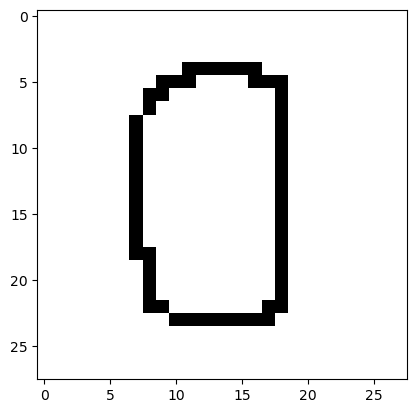

1/1 [==============================] - 0s 22ms/step
The digit maybe a 5


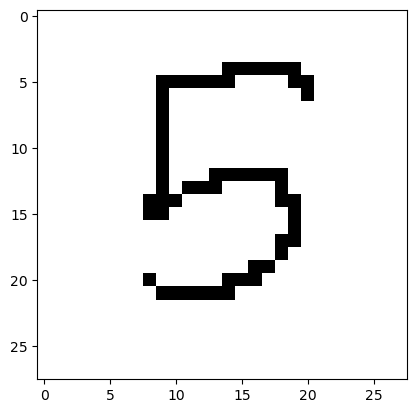

1/1 [==============================] - 0s 18ms/step
The digit maybe a 3


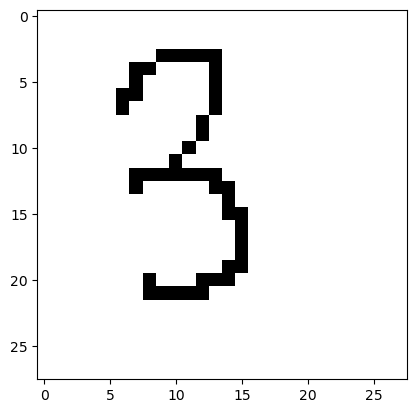

1/1 [==============================] - 0s 16ms/step
The digit maybe a 2


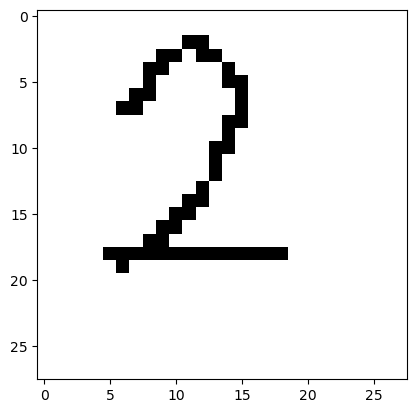

1/1 [==============================] - 0s 23ms/step
The digit maybe a 1


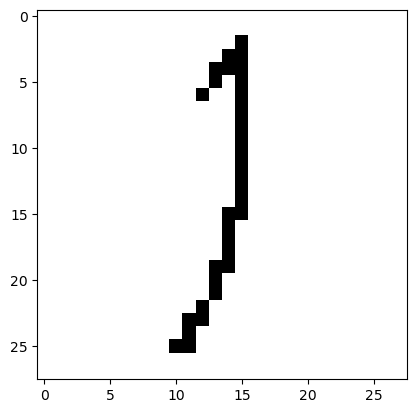

1/1 [==============================] - 0s 20ms/step
The digit maybe a 4


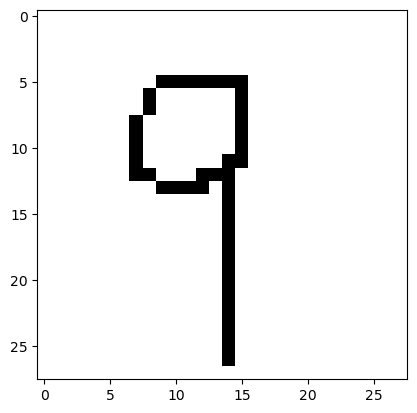

1/1 [==============================] - 0s 16ms/step
The digit maybe a 3


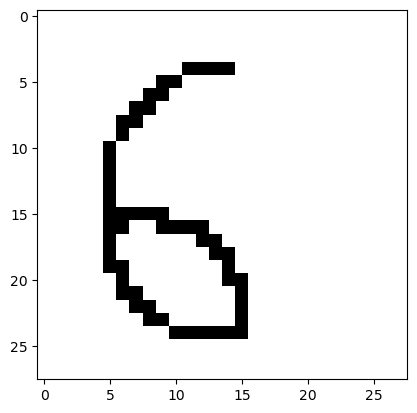

1/1 [==============================] - 0s 17ms/step
The digit maybe a 3


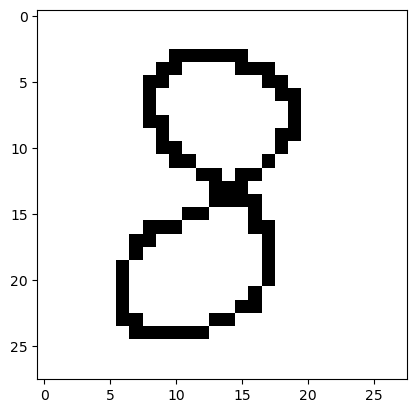

1/1 [==============================] - 0s 16ms/step
The digit maybe a 7


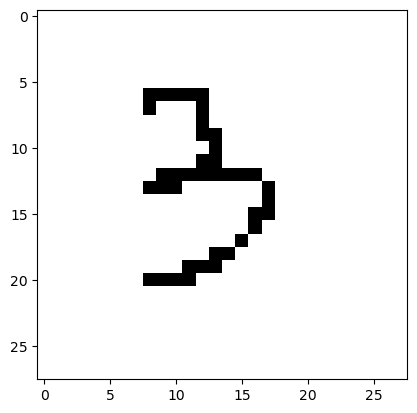

In [11]:
i = 1
while os.path.isfile(f"digits/img ({i}).png"):
    try:
        img = cv2.imread(f"digits/img ({i}).png")[:,:,0]
        img = np.invert(np.array([img]))
        test = model.predict(img)
        print(f"The digit maybe a {np.argmax(test)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
        i+=1
    except: print("Error") 
        
        
        

